In [216]:
# Importing necessary libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

#### Importing Dataset

In [217]:
# Step 1: Load the dataset
raw_data = pd.read_excel("C:/Users/rg191/OneDrive/Desktop/AXION RAY Assignments/DA -Task 2..xlsx")

In [218]:
raw_data.head(5)

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,PLANT,BUILD_COUNTRY,LAST_KNOWN_DLR_NAME,LAST_KNOWN_DLR_CITY,REPAIRING_DEALER_CODE,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION,REPAIR_DLR_POSTAL_CD,REPAIR_AGE,KM,COMPLAINT_CD_CSI,COMPLAINT_CD,VEH_TEST_GRP,COUNTRY_SALE_ISO,ORD_SELLING_SRC_CD,OPTN_FAMLY_CERTIFICATION,OPTF_FAMLY_EMISSIOF_SYSTEM,GLOBAL_LABOR_CODE,TRANSACTION_CATEGORY,CAMPAIGN_NBR,REPORTING_COST,TOTALCOST,LBRCOST,ENGINE,ENGINE_DESC,TRANSMISSION,TRANSMISSION_DESC,ENGINE_SOURCE_PLANT,ENGINE_TRACE_NBR,TRANSMISSION_SOURCE_PLANT,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,SIL,MX,Silverstone Motors,ST JOHNS,13-13992/309484,Apex Auto Sales,ST JOHNS,MI,1,488799101,6,8872,0,0-0310,T03.0354,US,13,FE9,FTB,130,FREG,NaN,370.03,370.03,61.46,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210281MFTX0488,287827.0,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,Elite Auto Group,FISHERS,13-14819/243038,SilverPeak Motors,GRAND RAPIDS,MN,1,557444215,5,16346,0,0-0310,T03.0354,US,48,FE9,FTB,2400,FREG,NaN,307.32,307.32,291.14,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210291MFTX0188,17749294.0,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,SHT,US,CrossRoads Dealership,SAN DIEGO,11-46466/119152,Quantum Car Traders,SAN DIEGO,CA,1,921083521,9,8887,0,0-0310,T00.0006,US,12,YF5,FF6,130,FREG,NaN,2457.45,3205.45,1012.67,EN0,NONE,MF1,NONE,NaN,NaN,NaN,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,NaN,MX,Westwood Wheels,MILWAUKEE,13-47099/113361,Summit Drive Auto,SLINGER,WI,1,530869027,10,15500,0,0-0890,T06.2375,US,13,FE9,FTB,130,FREG,NaN,445.28,445.28,63.18,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2210821MFYX0482,287827.0,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,LuxeAuto Sales,KELLOGG,11-47556/116725,Horizon Motors,LIBERTY LAKE,WA,1,990197623,0,8,0,0-0621,T06.2375,US,48,NE1,FUC,130,FREG,NaN,1439.65,1439.65,136.00,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2212994MGPX0790,17749294.0,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


#### Data Inspection

In [219]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [220]:
# Drop fully null columns
raw_data.drop(columns=['CAMPAIGN_NBR'], inplace=True)

In [221]:
# Columns to convert to object (categorical identifiers)
cols_to_convert = ['TRANSACTION_ID', 'DEALER_REGION', 'COMPLAINT_CD_CSI', 'ORD_SELLING_SRC_CD','GLOBAL_LABOR_CODE', 
                   'SRC_TXN_ID', 'SRC_VER_NBR', 'TRANSACTION_CNTR','LAST_KNOWN_DELVRY_TYPE_CD', 'TRANSMISSION_SOURCE_PLANT', 
                   'SALES_REGION_CODE']

# Convert them to object
raw_data[cols_to_convert] = raw_data[cols_to_convert].astype(object)

In [222]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    object        
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

### Data Auditing

In [223]:
# Creating UDF for continuous Variable summary
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]                    # Total no.of values
    n_miss = x.isna().sum()                 # no. of missing values
    perc_miss = n_miss * 100 / n_total      # Percentage of missing values
    
    # outliers - iqr
    q1 = x.quantile(0.25)                   # 25th percentile
    q3 = x.quantile(0.75)                   # 75th percentile
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr                 # Lower cutoff
    uc_iqr = q3 + 1.5 * iqr                 # Upper cutoff
    skew = x.skew()                         # finding skewness
    kurt = x.kurtosis()                     # finding kurtosis
    norm_flag = 'symmetric' if abs(skew) < 0.5 else 'skewed'        #Tells whether distribution is normal or skewed
    
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), lc_iqr, uc_iqr, x.min(), 
                       x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), x.quantile(0.25), x.quantile(0.5), 
                       x.quantile(0.75), x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max(), 
                       skew, kurt, norm_flag ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n_non_missing', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var', 'lc_iqr', 'uc_iqr','min', 
                             'p1', 'p5', 'p10', 'p25', 'p50', 
                             'p75', 'p90', 'p95', 'p99', 'max', 
                             'skewness', 'kurtosis', 'distribution']) 

In [224]:
# Creating UDF for categorical Variable summary
def categorical_var_summary(x):
    n_total = x.shape[0]                        # Total no.of values
    n_miss = x.isna().sum()                     # no. of missing values
    perc_miss = (n_miss / n_total) * 100        # Percentage of missing values
    most_freq_val = x.mode().iloc[0] if not x.mode().empty else None                 # Finding mode (most frequent value)
    most_freq_count = x.value_counts().iloc[0] if not x.value_counts().empty else None   # Count of mode value
    perc_most_freq = (most_freq_count / (n_total - n_miss)) * 100 if most_freq_count else None  # Percentage of mode value

    return pd.Series([
        x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
        most_freq_val, most_freq_count, perc_most_freq], 
        
        index=[
        'dtype', 'cardinality', 'n_total', 'n_non_missing', 'n_missing', 'perc_missing',
        'most_freq_val', 'most_freq_count', 'perc_most_freq'])

#### Finding Summary for both continuous and categorical columns

In [225]:
# Continuous column summary
numerical_summary = raw_data.select_dtypes(include='number').apply(continuous_var_summary)
numerical_summary

,REPAIR_AGE,KM,REPORTING_COST,TOTALCOST,LBRCOST,NON_CAUSAL_PART_QTY
dtype,int64,int64,float64,float64,float64,int64
cardinality,35,100,100,94,99,2
n_tot,100,100,100,100,100,100
n_non_missing,100,100,100,94,100,100
nmiss,0,0,0,6,0,0
perc_miss,0.0,0.0,0.0,6.0,0.0,0.0
sum,1494,2491423,53119.32,52749.24,10634.49,7
mean,14.94,24914.23,531.1932,561.162128,106.3449,0.07
std,12.367945,20747.078206,411.161608,452.796836,113.223074,0.256432
var,152.966061,430441254.077879,169053.868198,205024.974456,12819.464401,0.065758


In [226]:
# Continuous column summary
categorical_summary = raw_data.select_dtypes(include=['object', 'category']).apply(categorical_var_summary)
categorical_summary

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,PLANT,BUILD_COUNTRY,LAST_KNOWN_DLR_NAME,LAST_KNOWN_DLR_CITY,REPAIRING_DEALER_CODE,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION,REPAIR_DLR_POSTAL_CD,COMPLAINT_CD_CSI,COMPLAINT_CD,VEH_TEST_GRP,COUNTRY_SALE_ISO,ORD_SELLING_SRC_CD,OPTN_FAMLY_CERTIFICATION,OPTF_FAMLY_EMISSIOF_SYSTEM,GLOBAL_LABOR_CODE,TRANSACTION_CATEGORY,ENGINE,ENGINE_DESC,TRANSMISSION,TRANSMISSION_DESC,ENGINE_SOURCE_PLANT,ENGINE_TRACE_NBR,TRANSMISSION_SOURCE_PLANT,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,SALES_REGION_CODE
dtype,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
cardinality,98,32,93,100,18,4,11,6,26,11,3,100,94,95,100,93,39,2,92,1,7,23,6,7,3,8,4,2,12,12,19,20,9,88,6,88,100,10,1,2,41,22,11,2
n_total,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
n_non_missing,100,100,100,100,95,100,100,100,100,99,100,100,100,100,100,100,98,100,98,100,100,98,100,100,90,95,100,100,100,100,100,100,88,88,88,88,100,100,100,100,100,99,98,100
n_missing,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,2,0,2,0,0,2,0,0,10,5,0,0,0,0,0,0,12,12,12,12,0,0,0,0,0,1,2,0
perc_missing,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
most_freq_val,1HRFFHEL8RZ133325,13025,REPLACED STEERING WHEEL,#UPDATE#CUSTOMER STATES VEHICLE'S STEERING WHE...,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,SIL,US,AllStar Car Traders,BOLINGBROOK,11-46346/118677,Apex Auto Sales,GRAND RAPIDS,CA,1,907551909,0,0-0890,T05.3386,US,13,FE9,FTB,130,FREG,L84,"GAS, 8 CYL, 5.3L, V8, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,V2210281MFTX0488,287827.0,21210129IKBP0429,2808841910,4,1,N,CF10543,1500,10.0,1
most_freq_count,2,10,3,1,45,78,52,50,20,19,73,1,2,3,1,3,9,97,3,100,40,19,84,39,62,62,78,89,24,24,28,28,15,1,31,1,1,43,100,62,15,52,59,97
perc_most_freq,2.0,10.0,3.0,1.0,47.368421,78.0,52.0,50.0,20.0,19.191919,73.0,1.0,2.0,3.0,1.0,3.0,9.183673,97.0,3.061224,100.0,40.0,19.387755,84.0,39.0,68.888889,65.263158,78.0,89.0,24.0,24.0,28.0,28.0,17.045455,1.136364,35.227273,1.136364,1.0,43.0,100.0,62.0,15.0,52.525253,60.204082,97.0


### Data Cleaning

In [227]:
# Cleaning object (text) columns by stripping whitespace and converting to lowercase
for col in raw_data.select_dtypes(include='object').columns:
    raw_data[col] = raw_data[col].astype(str).str.strip().str.lower()

In [228]:
# Replacing null-like strings with actual NaN
raw_data.replace(['nan', 'none', 'null', '', 'na'], np.nan, inplace=True)

In [229]:
raw_data.select_dtypes(include='number').columns

Index(['REPAIR_AGE', 'KM', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST',
       'NON_CAUSAL_PART_QTY'],
      dtype='object')

#### Missing value imputation 

In [230]:
# Separating column types
num_cols = raw_data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = raw_data.select_dtypes(include=['object']).columns

# Checking skewness and separate skewed vs non-skewed
skew_threshold = 0.5  # we can tune this
skewness = raw_data[num_cols].skew()
skewed_cols = skewness[abs(skewness) > skew_threshold].index
normal_cols = skewness[abs(skewness) <= skew_threshold].index

# Imputing numericals
# Median for skewed
if len(skewed_cols) > 0:
    median_imputer = SimpleImputer(strategy='median')
    raw_data[skewed_cols] = median_imputer.fit_transform(raw_data[skewed_cols])

# Mean for non-skewed
if len(normal_cols) > 0:
    mean_imputer = SimpleImputer(strategy='mean')
    raw_data[normal_cols] = mean_imputer.fit_transform(raw_data[normal_cols])

# Imputing categorical columns
for col in cat_cols:
    # As it  is a small dataset so, not imputing with mode
    raw_data[col].fillna("Missing", inplace=True)

In [231]:
raw_data

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,PLANT,BUILD_COUNTRY,LAST_KNOWN_DLR_NAME,LAST_KNOWN_DLR_CITY,REPAIRING_DEALER_CODE,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION,REPAIR_DLR_POSTAL_CD,REPAIR_AGE,KM,COMPLAINT_CD_CSI,COMPLAINT_CD,VEH_TEST_GRP,COUNTRY_SALE_ISO,ORD_SELLING_SRC_CD,OPTN_FAMLY_CERTIFICATION,OPTF_FAMLY_EMISSIOF_SYSTEM,GLOBAL_LABOR_CODE,TRANSACTION_CATEGORY,REPORTING_COST,TOTALCOST,LBRCOST,ENGINE,ENGINE_DESC,TRANSMISSION,TRANSMISSION_DESC,ENGINE_SOURCE_PLANT,ENGINE_TRACE_NBR,TRANSMISSION_SOURCE_PLANT,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3hcfdde89sh220903,13021,replaced steering wheel now okay,steering wheel coming apart,2024-01-02,wheel asm-strg *jet black,steering wheel replacement,full-size trucks,crew cab,t1ccf,sil,mx,silverstone motors,st johns,13-13992/309484,apex auto sales,st johns,mi,1,488799101,6.0,8872.0,0,0-0310,t03.0354,us,13,fe9,ftb,130,freg,370.03,370.030,61.46,lz0,"diesel, 6 cyl, 3.0l, cri, l6, dohc, turbo, vgt...",mqc,"byt 10 spd, 10l80, atss, etrs, cpa, gen 2",70628511,v2210281mftx0488,287827.0,s2210121cnjx0941,2808908219,6,1,n,cf10543,1500,21.0,0.0,1
1,1hrffee8xsz230636,13028,checked - found dtc's u0229 - u1530 set in bcm...,customer states heated steering wheel inop,2024-01-03,module asm-strg whl ht cont,heated steering wheel module replacement,full-size trucks,crew cab,t1cgf,ftw,us,elite auto group,fishers,13-14819/243038,silverpeak motors,grand rapids,mn,1,557444215,5.0,16346.0,0,0-0310,t03.0354,us,48,fe9,ftb,2400,freg,307.32,307.320,291.14,lz0,"diesel, 6 cyl, 3.0l, cri, l6, dohc, turbo, vgt...",mqc,"byt 10 spd, 10l80, atss, etrs, cpa, gen 2",70628511,v2210291mftx0188,17749294.0,r2210881cnjx0287,2808841910,6,1,y,tf10543,1500,10.0,0.0,1
2,1hyksmrk6sz000990,13035,approved 4.9(olh) for added diagnostics with t...,owner reports: the super cruise bar on the ste...,2024-01-04,wheel asm-strg *backen blackk,steering wheel replacement,bev,4 door utility,l233-lsop,sht,us,crossroads dealership,san diego,11-46466/119152,quantum car traders,san diego,ca,1,921083521,9.0,8887.0,0,0-0310,t00.0006,us,12,yf5,ff6,130,freg,2457.45,3205.450,1012.67,en0,Missing,mf1,Missing,Missing,Missing,Missing,Missing,2809979441,4,1,y,6mb26,lux-1,10.0,0.0,1
3,3hcfdfel3sh241701,13021,steering wheel replacement,customer states the lettering and finish on th...,2024-01-04,wheel asm-strg *jet black,steering wheel replacement,full-size trucks,crew cab,t1ccf,Missing,mx,westwood wheels,milwaukee,13-47099/113361,summit drive auto,slinger,wi,1,530869027,10.0,15500.0,0,0-0890,t06.2375,us,13,fe9,ftb,130,freg,445.28,445.280,63.18,l87,"gas, 8 cyl, v8, 6.2l, di, dfm, alum, gen 5",mhs,"byt 10 spd, 10l80, grx, gen 1, atss, etrs, var 1",830107152,n2210821mfyx0482,287827.0,s1210822ckjx0291,2808892288,6,1,y,cf10543,1500,10.0,0.0,1
4,1hrffhel1rz181474,13021,replaced steering message no longer displayed,c/s: customer states the service driver assist...,2024-01-05,wheel asm-strg *jet black,steering wheel replacement,full-size trucks,crew cab,t1cgf,ftw,us,luxeauto sales,kellogg,11-47556/116725,horizon motors,liberty lake,wa,1,990197623,0.0,8.0,0,0-0621,t06.2375,us,48,ne1,fuc,130,freg,1439.65,1439.650,136.00,l87,"gas, 8 cyl, v8, 6.2l, di, dfm, alum, gen 5",mhs,"byt 10 spd, 10l80, grx, gen 1, atss, etrs, var 1",830107152,n2212994mgpx0790,17749294.0,r2212982ckjx0282,2808901882,8,1,n,tf10543,1500,10.0,0.0,1
5,3hrffhed7rh167541,13026,remove and replace steering wheel wire harness,horn and steering wheel switches are inoperable,2024-01-05,harness asm-strg whl horn sw wrg,steering wheel horn switch wiring harness repl...,full-size trucks,crew cab,t1cgf,sil,mx,horizon motors,omaha,13-05637/165732,prestige wheels,columbus,ne,1,686012808,0.0,14.0,0,0-0890,t05.3330,us,48,fe9,ftb,20,freg,216.75,216.750,139.84,l84,"gas, 8 cyl, 5.3l, v8

#### Outlier Treatment

In [232]:
# Outlier treatment using IQR capping
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        df[col] = df[col].apply(lambda x:lower_bound if x < lower_bound else 
                                upper_bound if x > upper_bound else x)

# Apply outlier treatment on numerical columns
cap_outliers_iqr(raw_data, num_cols)

### Identifying Critical columns

#### Top 5 Most Critical Columns (with exact names)

##### 1. CAUSAL_PART_NM
* What it tells: The name of the part responsible for the repair.

* Why it's critical: Stakeholders can prioritize parts with high failure frequency and investigate suppliers/design issues.

* Use Case: Part-level failure trend analysis, supplier quality reporting.

##### 2. CORRECTION_VERBATIM
* What it tells: Free-text technician notes on what was done to fix the issue.

* Why it's critical: This reflects the actual resolution — we can use NLP to create action tags (e.g., "replaced", "reprogrammed").

* Use Case: Root cause clustering, service procedure improvement.

##### 3. CUSTOMER_VERBATIM
* What it tells: Raw customer complaints.

* Why it's critical: This is the true voice of the customer, often the first signal of an issue.

* Use Case: Sentiment analysis, customer experience feedback loop, pattern detection.

##### 4. REPAIR_AGE
* What it tells: Time (likely in months) between delivery and repair.
 
* Why it's critical: It lets us analyze when parts are failing  (early vs. late life).

* Use Case: Warranty forecasting, product lifecycle analysis.

##### 5. TOTALCOST
* What it tells: Total cost incurred for the repair (labor + parts).

* Why it's critical: Costly repairs directly affect warranty expense and profit margins.

* Use Case: High-cost repair drivers, ROI on recalls or redesigns.

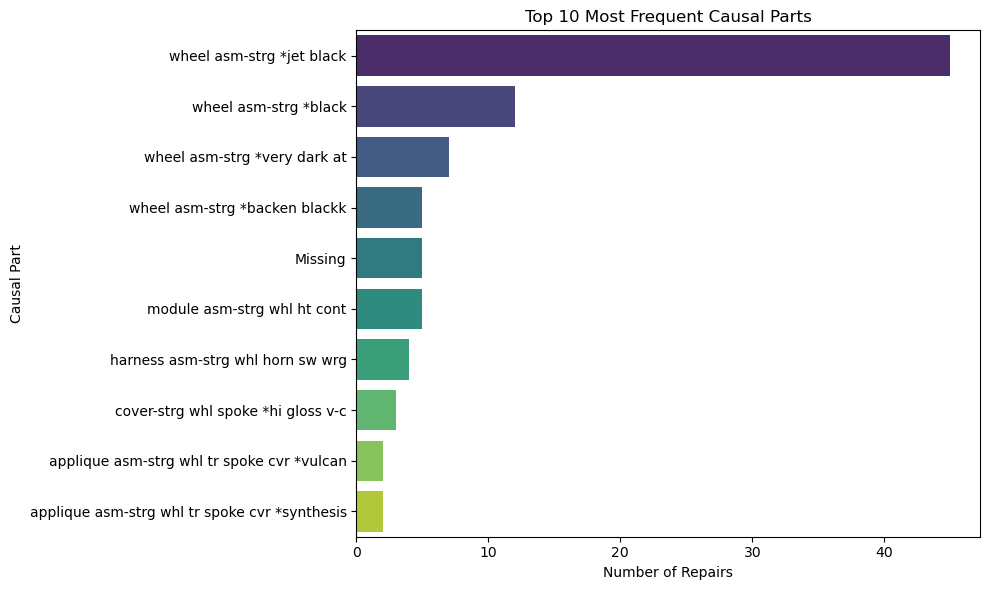

In [233]:
# 1. Bar Plot: Top 10 Most Frequent Causal Parts
plt.figure(figsize=(10, 6))
top_parts = raw_data['CAUSAL_PART_NM'].value_counts().head(10)
sns.barplot(x=top_parts.values, y=top_parts.index, palette="viridis")
plt.title("Top 10 Most Frequent Causal Parts")
plt.xlabel("Number of Repairs")
plt.ylabel("Causal Part")
plt.tight_layout()
plt.show()

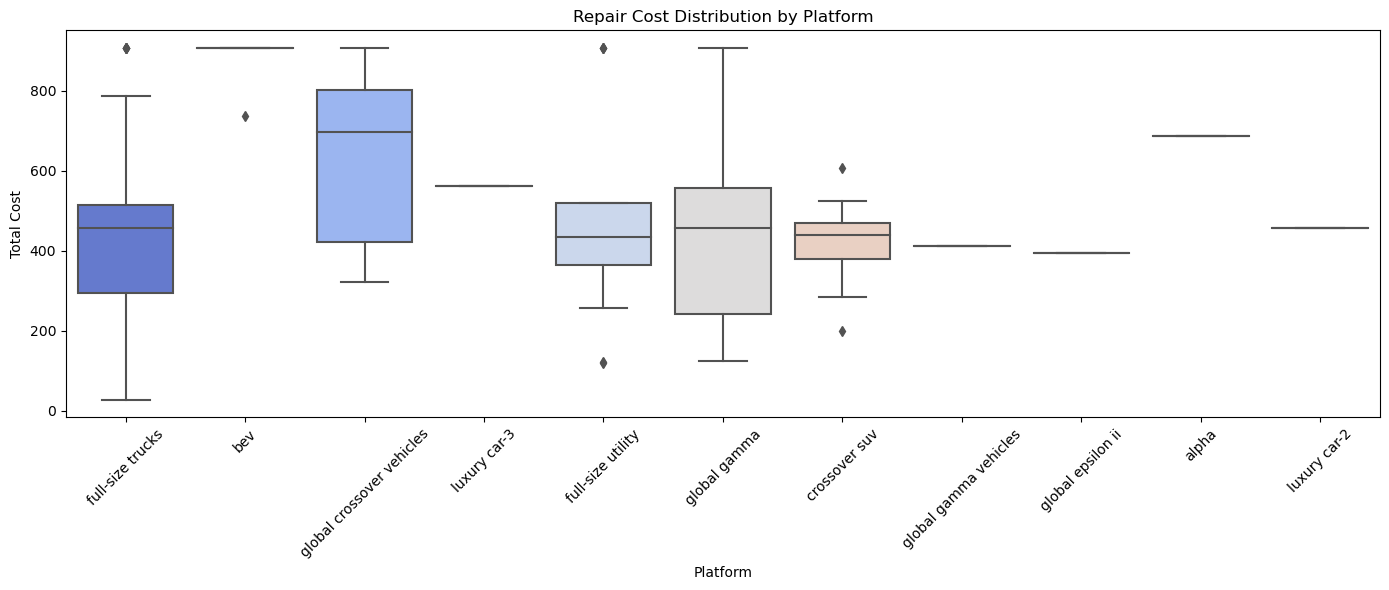

In [234]:
# 2. Box Plot: Distribution of Total Cost by Platform
plt.figure(figsize=(14, 6))
sns.boxplot(data=raw_data, x='PLATFORM', y='TOTALCOST', palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Repair Cost Distribution by Platform")
plt.ylabel("Total Cost")
plt.xlabel("Platform")
plt.tight_layout()
plt.show()

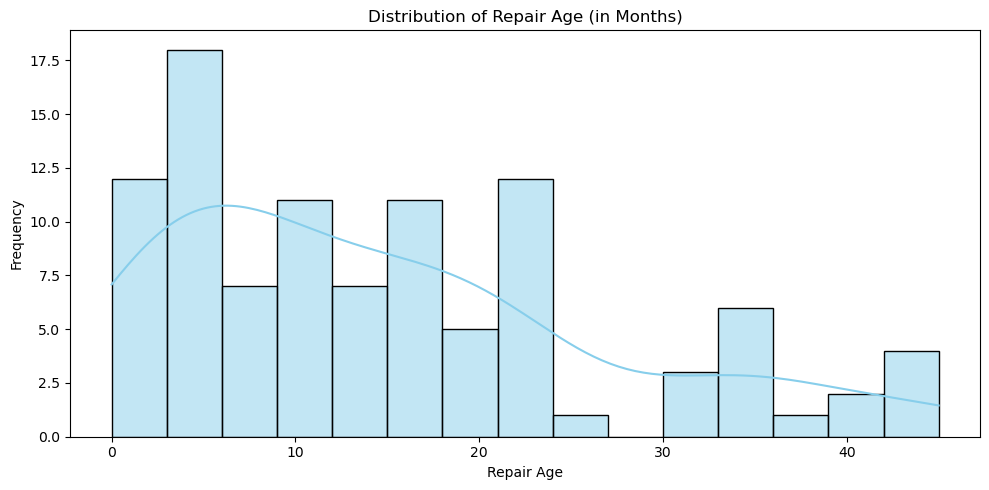

In [235]:
# 3. Histogram: Repair Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(raw_data['REPAIR_AGE'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Repair Age (in Months)")
plt.xlabel("Repair Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Generating tags/features from free text available

In [236]:
# Download required NLTK resources (run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Combine both text columns
text_data = raw_data['CUSTOMER_VERBATIM'].fillna('') + ' ' + raw_data['CORRECTION_VERBATIM'].fillna('')

# Preprocessing text: tokenize, remove stopwords, lemmatize
all_words = []
for text in text_data:
    tokens = nltk.word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    all_words.extend(words)

# Get top 50 keywords
top_keywords = [word for word, count in Counter(all_words).most_common(50)]
print("Top 50 Keywords:", top_keywords)

Top 50 Keywords: ['wheel', 'steering', 'customer', 'state', 'replaced', 'heated', 'coming', 'replace', 'found', 'pra', 'sop', 'part', 'apart', 'check', 'removed', 'module', 'trim', 'loose', 'new', 'advise', 'replacement', 'code', 'leather', 'inop', 'time', 'concern', 'order', 'light', 'work', 'side', 'verified', 'turn', 'per', 'cruise', 'operation', 'horn', 'assembly', 'ok', 'cover', 'stitching', 'checked', 'cust', 'working', 'back', 'ro', 'repair', 'tested', 'system', 'remove', 'tech']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rg191\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rg191\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rg191\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rg191\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [237]:
top_keywords= ['wheel', 'steering', 'module', 'trim', 'horn', 'assembly', 'cover', 'light', 'system',
    'heated', 'loose', 'inop', 'code', 'replaced', 'replace', 'removed', 'repair', 'checked', 'tested', 'check', 'working']

# Function to extract tags from text
def extract_tags(text):
    text = str(text).lower()
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha()]
    tags = [word for word in top_keywords if word in tokens]
    return ', '.join(tags) if tags else 'other'

# Apply to both columns
raw_data['CUSTOMER_TAGS'] = raw_data['CUSTOMER_VERBATIM'].apply(extract_tags)
raw_data['CORRECTION_TAGS'] = raw_data['CORRECTION_VERBATIM'].apply(extract_tags)

# Preview
raw_data[['CUSTOMER_VERBATIM', 'CUSTOMER_TAGS', 'CORRECTION_VERBATIM', 'CORRECTION_TAGS']].head()

,CUSTOMER_VERBATIM,CUSTOMER_TAGS,CORRECTION_VERBATIM,CORRECTION_TAGS
0,steering wheel coming apart,"wheel, steering",replaced steering wheel now okay,"wheel, steering, replaced"
1,customer states heated steering wheel inop,"wheel, steering, heated, inop",checked - found dtc's u0229 - u1530 set in bcm...,"module, heated, checked, tested"
2,owner reports: the super cruise bar on the ste...,"wheel, steering, check",approved 4.9(olh) for added diagnostics with t...,"wheel, steering, system, replaced, check"
3,customer states the lettering and finish on th...,"wheel, steering",steering wheel replacement,"wheel, steering"
4,c/s: customer states the service driver assist...,system,replaced steering message no longer displayed,"steering, replaced"


In [238]:
# Save tagged dataset
raw_data.to_excel('C:/Users/rg191/OneDrive/Desktop/AXION RAY Assignments/Cleaned_Tagged_Data_Task2.xlsx', index=False)